### Explore Bike Share Data

For this project, your goal is to ask and answer three questions about the available bikeshare data from Washington, Chicago, and New York.  This notebook can be submitted directly through the workspace when you are confident in your results.

You will be graded against the project [Rubric](https://review.udacity.com/#!/rubrics/2508/view) by a mentor after you have submitted.  To get you started, you can use the template below, but feel free to be creative in your solutions!

In [1]:
library("plyr")

In [2]:
library("ggplot2")

In [3]:
library(lubridate)


Attaching package: ‘lubridate’

The following object is masked from ‘package:plyr’:

    here

The following object is masked from ‘package:base’:

    date



In [4]:
installed.packages('ggplot2')

Package,LibPath,Version,Priority,Depends,Imports,LinkingTo,Suggests,Enhances,License,License_is_FOSS,License_restricts_use,OS_type,Archs,MD5sum,NeedsCompilation,Built


In [5]:
ny = read.csv('new_york_city.csv')
wash = read.csv('washington.csv')
chi = read.csv('chicago.csv')

In [6]:
head(ny)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year
5688089,2017-06-11 14:55:05,2017-06-11 15:08:21,795,Suffolk St & Stanton St,W Broadway & Spring St,Subscriber,Male,1998
4096714,2017-05-11 15:30:11,2017-05-11 15:41:43,692,Lexington Ave & E 63 St,1 Ave & E 78 St,Subscriber,Male,1981
2173887,2017-03-29 13:26:26,2017-03-29 13:48:31,1325,1 Pl & Clinton St,Henry St & Degraw St,Subscriber,Male,1987
3945638,2017-05-08 19:47:18,2017-05-08 19:59:01,703,Barrow St & Hudson St,W 20 St & 8 Ave,Subscriber,Female,1986
6208972,2017-06-21 07:49:16,2017-06-21 07:54:46,329,1 Ave & E 44 St,E 53 St & 3 Ave,Subscriber,Male,1992
1285652,2017-02-22 18:55:24,2017-02-22 19:12:03,998,State St & Smith St,Bond St & Fulton St,Subscriber,Male,1986


In [7]:
head(wash)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type
1621326,2017-06-21 08:36:34,2017-06-21 08:44:43,489.066,14th & Belmont St NW,15th & K St NW,Subscriber
482740,2017-03-11 10:40:00,2017-03-11 10:46:00,402.549,Yuma St & Tenley Circle NW,Connecticut Ave & Yuma St NW,Subscriber
1330037,2017-05-30 01:02:59,2017-05-30 01:13:37,637.251,17th St & Massachusetts Ave NW,5th & K St NW,Subscriber
665458,2017-04-02 07:48:35,2017-04-02 08:19:03,1827.341,Constitution Ave & 2nd St NW/DOL,M St & Pennsylvania Ave NW,Customer
1481135,2017-06-10 08:36:28,2017-06-10 09:02:17,1549.427,Henry Bacon Dr & Lincoln Memorial Circle NW,Maine Ave & 7th St SW,Subscriber
1148202,2017-05-14 07:18:18,2017-05-14 07:24:56,398.000,1st & K St SE,Eastern Market Metro / Pennsylvania Ave & 7th St SE,Subscriber


In [8]:
head(chi)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year
1423854,2017-06-23 15:09:32,2017-06-23 15:14:53,321,Wood St & Hubbard St,Damen Ave & Chicago Ave,Subscriber,Male,1992
955915,2017-05-25 18:19:03,2017-05-25 18:45:53,1610,Theater on the Lake,Sheffield Ave & Waveland Ave,Subscriber,Female,1992
9031,2017-01-04 08:27:49,2017-01-04 08:34:45,416,May St & Taylor St,Wood St & Taylor St,Subscriber,Male,1981
304487,2017-03-06 13:49:38,2017-03-06 13:55:28,350,Christiana Ave & Lawrence Ave,St. Louis Ave & Balmoral Ave,Subscriber,Male,1986
45207,2017-01-17 14:53:07,2017-01-17 15:02:01,534,Clark St & Randolph St,Desplaines St & Jackson Blvd,Subscriber,Male,1975
1473887,2017-06-26 09:01:20,2017-06-26 09:11:06,586,Clinton St & Washington Blvd,Canal St & Taylor St,Subscriber,Male,1990


### To concatenate all three datasets

In [9]:
Bike_share_df <- rbind.fill(ny,chi,wash)

### Concate new york and chicago datasets

In [10]:
NY_Chicago_df <- rbind.fill(ny,chi)

## create a mode function

In [11]:
Mode <- function(x, na.rm = TRUE) {
  if(na.rm){
    x = x[!is.na(x)]
  }

  ux <- unique(x)
  return(ux[which.max(tabulate(match(x, ux)))])
}

# Question 1

### Popular times of travel

# What is the most common month?

In [12]:
#This will add a new column (Month) to the dataframe with the specified format.

chi$Month <- format(as.Date(chi$Start.Time), "%m")

#calculate the mode of the months

chi_month_mode <- chi$Month
chi_month_mode <- Mode(chi_month_mode)
paste("The most common month in Chicago city is: ", chi_month_mode)

[1] "The most common month in Chicago city is:  06"

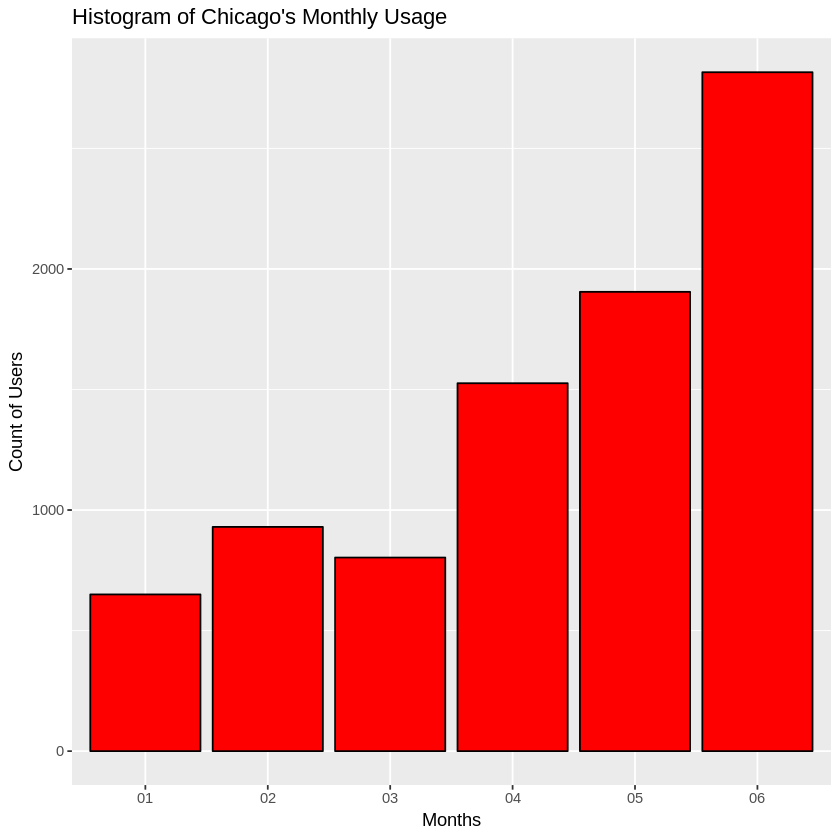

In [13]:
#plot of the most common month in chicago
qplot(x=Month,data=chi, color=I('Black'),fill=I('red'))+
ggtitle("Histogram of Chicago's Monthly Usage") +
labs(x = "Months")+
labs(y = "Count of Users")


In [14]:
#This will add a new column (Month) to the dataframe with the specified format.

ny$Month <- format(as.Date(ny$Start.Time), "%m")

#calculate the mode of the months

ny_month_mode <- ny$Month
ny_month_mode <- Mode(ny_month_mode)
paste("The most common month in New York city is: ", ny_month_mode)

[1] "The most common month in New York city is:  06"

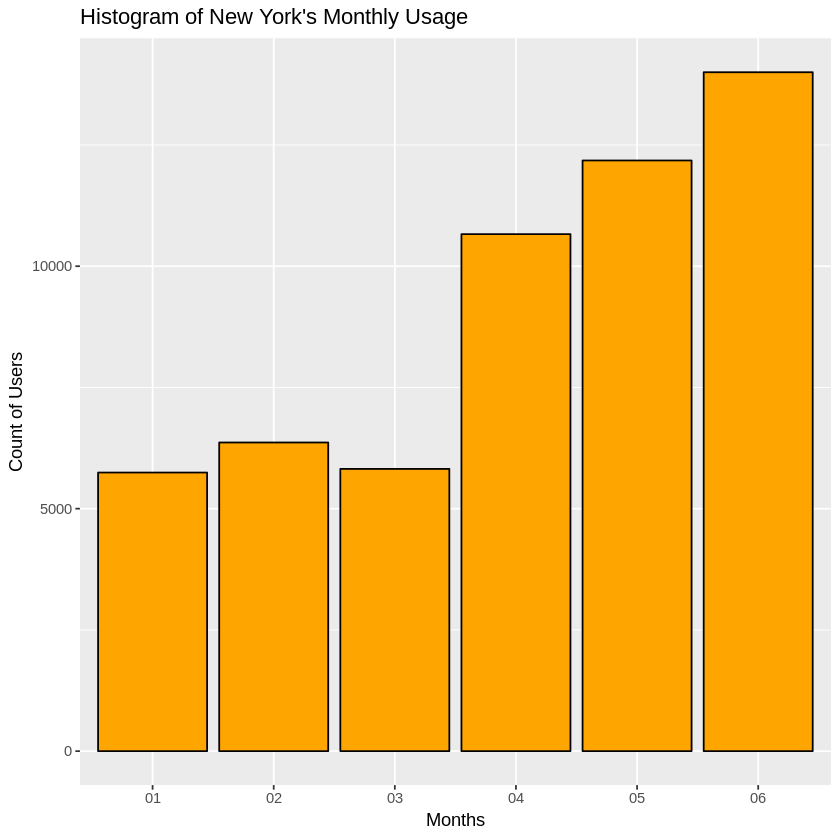

In [15]:
#plot of the most common month in New York City

qplot(x=Month,data=ny, color=I('Black'),fill=I('orange'))+
ggtitle("Histogram of New York's Monthly Usage") +
labs(x = "Months")+
labs(y = "Count of Users")


In [16]:
#This will add a new column (Month) to the dataframe with the specified format.

wash$Month <- format(as.Date(wash$Start.Time), "%m")

#calculate the mode of the months

wash_month_mode <- wash$Month
wash_month_mode <- Mode(wash_month_mode)
paste("The most common month in Washington city is: ", wash_month_mode)

[1] "The most common month in Washington city is:  06"

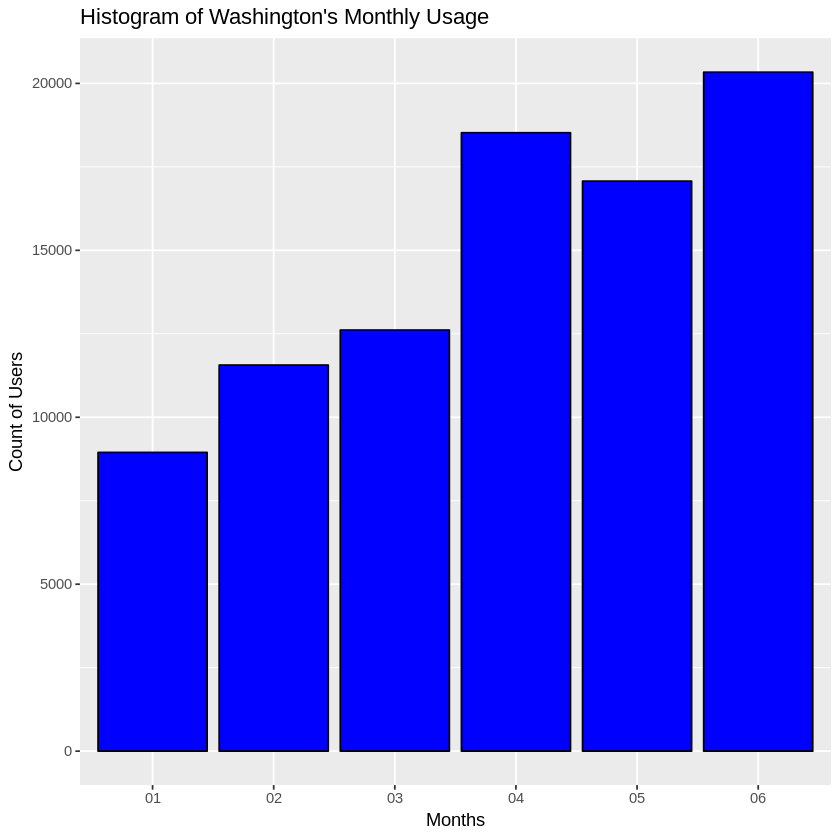

In [17]:
qplot(x=Month,data=na.omit(wash), color=I('Black'),fill=I('Blue'))+
ggtitle("Histogram of Washington's Monthly Usage") +
labs(x = "Months")+
labs(y = "Count of Users")

In [18]:
#This will add a new column (Month) to the dataframe with the specified format.

Bike_share_df$Month <- format(as.Date(Bike_share_df$Start.Time), "%m")

#calculate the mode of the months

month_mode <- Bike_share_df$Month
month_mode <- Mode(month_mode)
paste("The most common month in all three cities is: ", month_mode)

[1] "The most common month in all three cities is:  06"

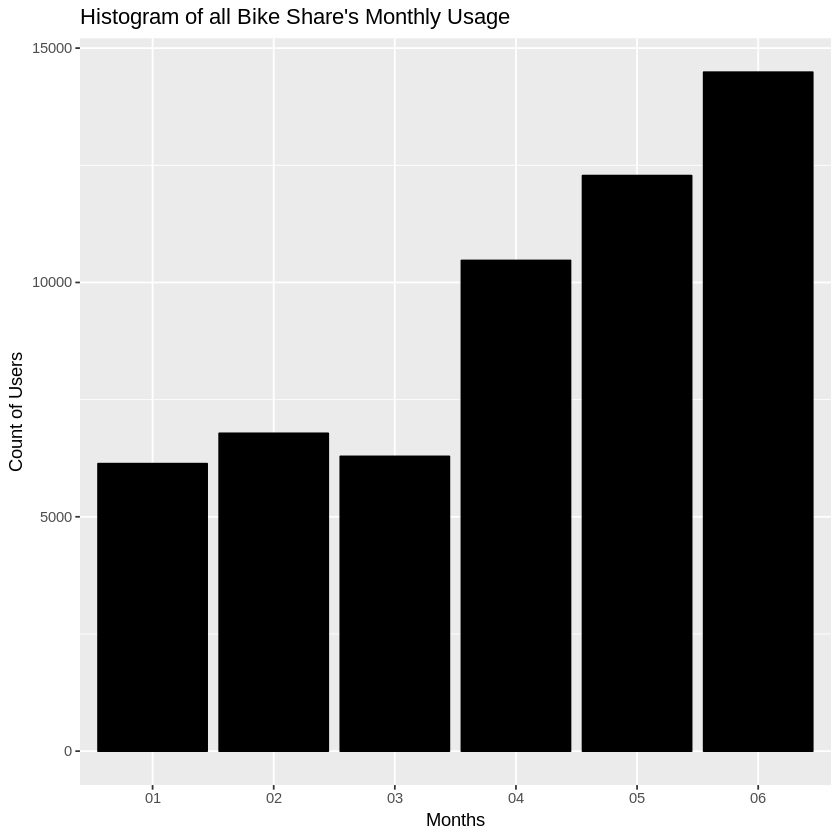

In [19]:
qplot(x=Month,data= na.omit(Bike_share_df), color=I('Black'),fill=I('Black'))+
ggtitle("Histogram of all Bike Share's Monthly Usage") +
labs(x = "Months")+
labs(y = "Count of Users")

From the above exploration, It is shown that;
1. The most common month in Chicago city is:06(June)
2. The most common month in New York city is:06(June)
3. The most common month in Washington city is:06(June)
4. While, The most common month in all three cities is:06(June)

# What is the most common weekday?

In [20]:
#This will add a new column (Weekday) to the dataframe with the specified format.

chi$Weekday <- format(as.Date(chi$Start.Time), "%A")

#calculate the mode of the weekdays
chi_wk_mode <- chi$Weekday
chi_wk_mode <- Mode(chi_wk_mode)
paste("The most common weekday in Chicago city is: ", chi_wk_mode)

[1] "The most common weekday in Chicago city is:  Monday"

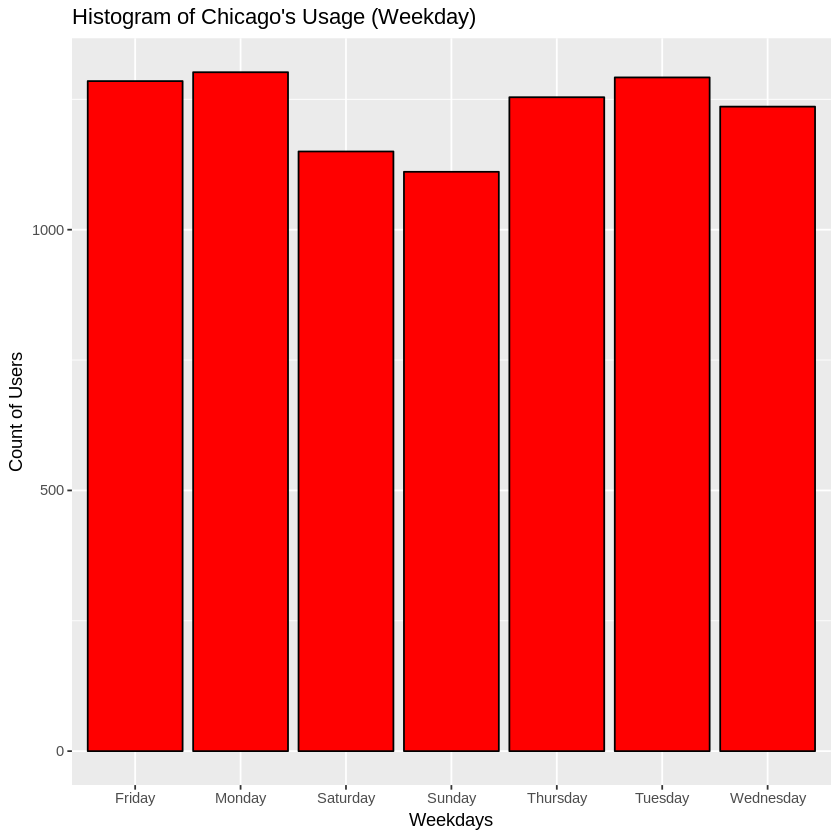

In [21]:
qplot(x=Weekday,data=chi, color=I('Black'),fill=I('red'))+
ggtitle("Histogram of Chicago's Usage (Weekday)") +
labs(x = "Weekdays")+
labs(y = "Count of Users")


In [22]:
#This will add a new column (Weekday) to the dataframe with the specified format.

ny$Weekday <- format(as.Date(ny$Start.Time), "%A")

#calculate the mode of the weekdays
ny_wk_mode <- ny$Weekday
ny_wk_mode <- Mode(ny_wk_mode)
paste("The most common weekday in New York city is: ", ny_wk_mode)

[1] "The most common weekday in New York city is:  Wednesday"

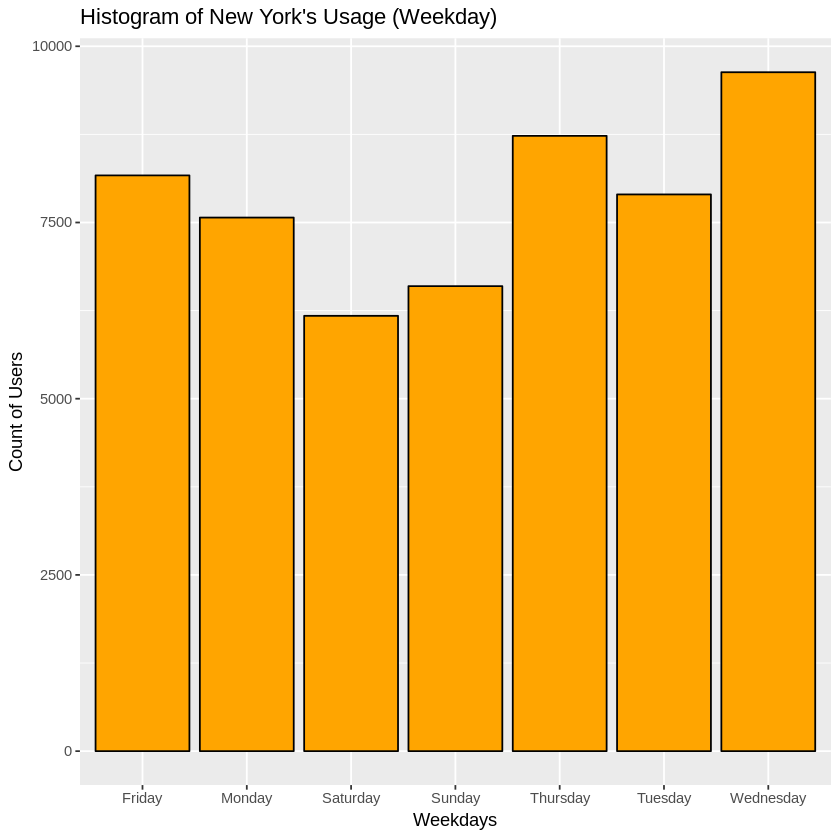

In [23]:
qplot(x=Weekday,data=ny, color=I('Black'),fill=I('orange'))+
ggtitle("Histogram of New York's Usage (Weekday)") +
labs(x = "Weekdays")+
labs(y = "Count of Users")


In [24]:
#This will add a new column (Weekday) to the dataframe with the specified format.

wash$Weekday <- format(as.Date(wash$Start.Time), "%A")

#calculate the mode of the weekdays
wash_wk_mode <- wash$Weekday
wash_wk_mode <- Mode(wash_wk_mode)
paste("The most common weekday in Washington city is: ", wash_wk_mode)

[1] "The most common weekday in Washington city is:  Wednesday"

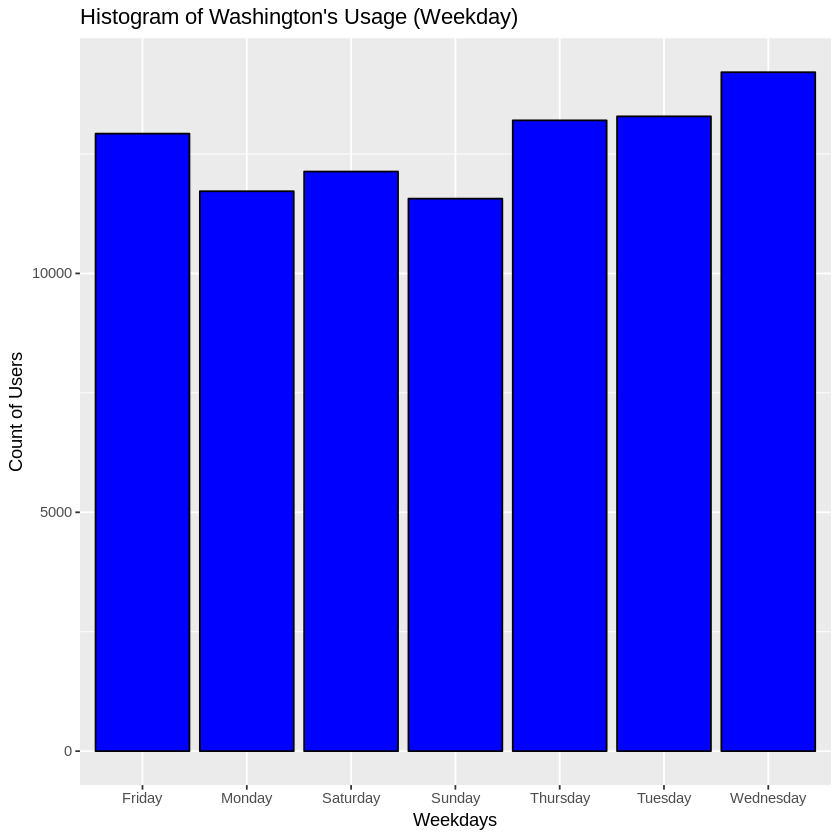

In [25]:
qplot(x=Weekday,data=na.omit(wash), color=I('Black'),fill=I('Blue'))+
ggtitle("Histogram of Washington's Usage (Weekday)") +
labs(x = "Weekdays")+
labs(y = "Count of Users")


In [26]:
#This will add a new column (Weekday) to the dataframe with the specified format.

Bike_share_df$Weekday <- format(as.Date(Bike_share_df$Start.Time), "%A")

#calculate the mode of the weekdays
BS_wk_mode <- Bike_share_df$Weekday
BS_wk_mode <- Mode(BS_wk_mode)
paste("The most common weekday in all three cities is: ", BS_wk_mode)

[1] "The most common weekday in all three cities is:  Wednesday"

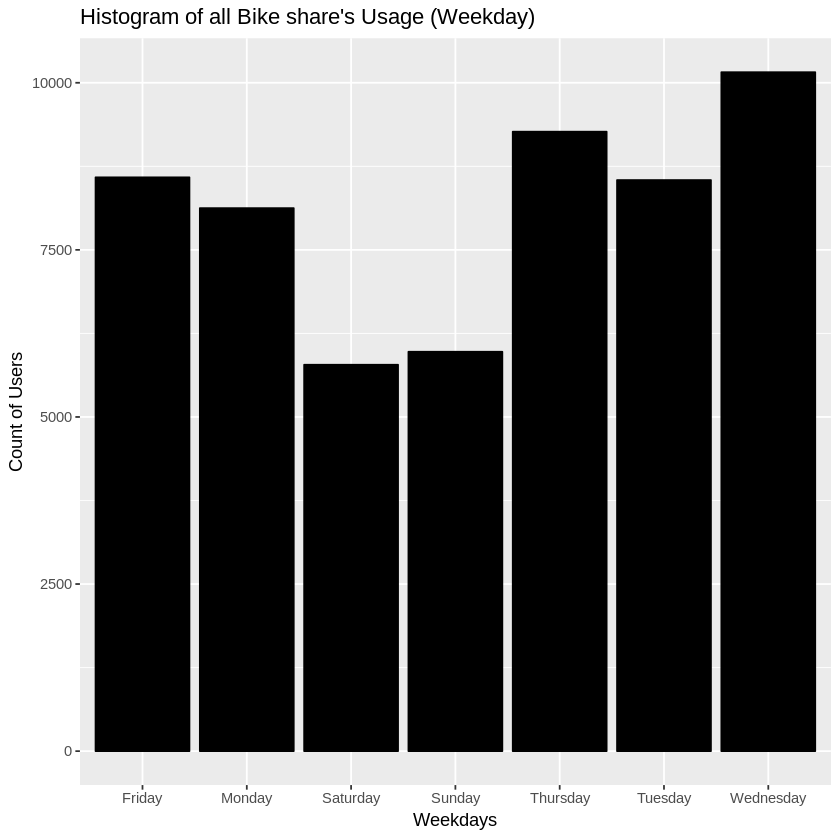

In [27]:
qplot(x=Weekday,data=na.omit(Bike_share_df), color=I('Black'),fill=I('Black'))+
ggtitle("Histogram of all Bike share's Usage (Weekday)") +
labs(x = "Weekdays")+
labs(y = "Count of Users")


From the above exploration, It is shown that;
1. The most common Weekday in Chicago city is: Monday
2. The most common Weekday in New York city is: Wednesday
3. The most common Weekday in Washington city is: Wednesday
4. While, The most common Weekday in all three cities is: Wednesday

# What is the most common Hour?

In [28]:
#This will add a new column (Hour) to the dataframe with the specified format.

chi$Hour <- format(as.POSIXct(strptime(chi$Start.Time,"%Y-%m-%d %H:%M:%S",tz="")),format="%H")

#calculate the mode of the weekdays
chi_Hour_mode <- chi$Hour
chi_Hour_mode <- Mode(chi_Hour_mode)
paste("The most common Hour in Chicago city is: ", chi_Hour_mode)

[1] "The most common Hour in Chicago city is:  17"

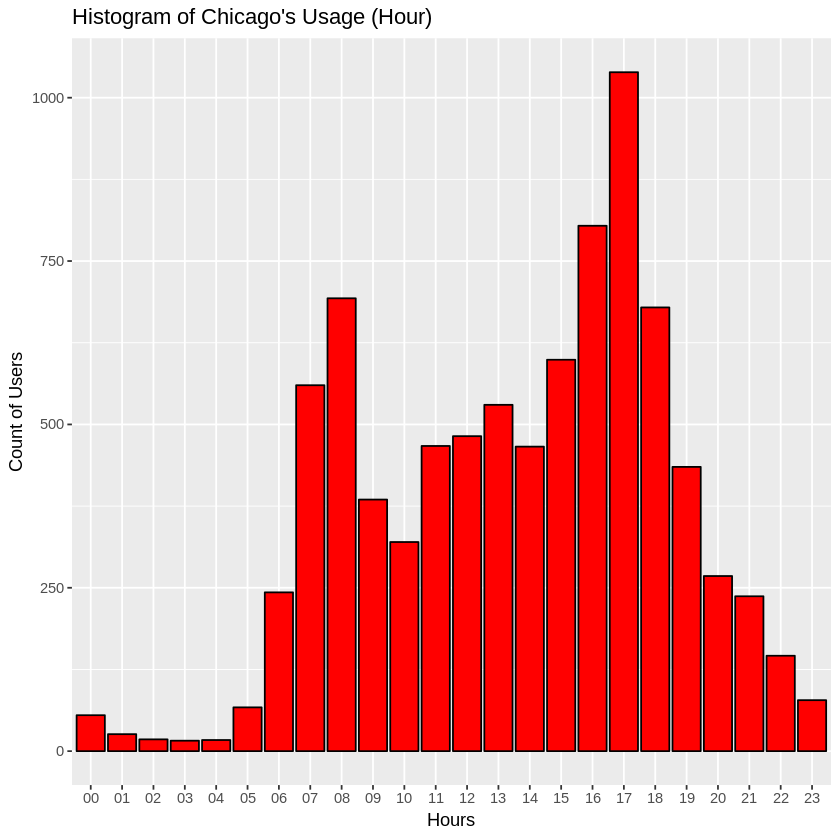

In [29]:
qplot(x=chi$Hour ,data=chi, color=I('Black'),fill=I('red'))+
ggtitle("Histogram of Chicago's Usage (Hour)") +
labs(x = "Hours")+
labs(y = "Count of Users")


In [30]:
#This will add a new column (Hour) to the dataframe with the specified format.

ny$Hour <- format(as.POSIXct(strptime(ny$Start.Time,"%Y-%m-%d %H:%M:%S",tz="")),format="%H")

#calculate the mode of the weekdays
ny_Hour_mode <- ny$Hour
ny_Hour_mode <- Mode(ny_Hour_mode)
paste("The most common Hour in New York city is: ", ny_Hour_mode)

[1] "The most common Hour in New York city is:  17"

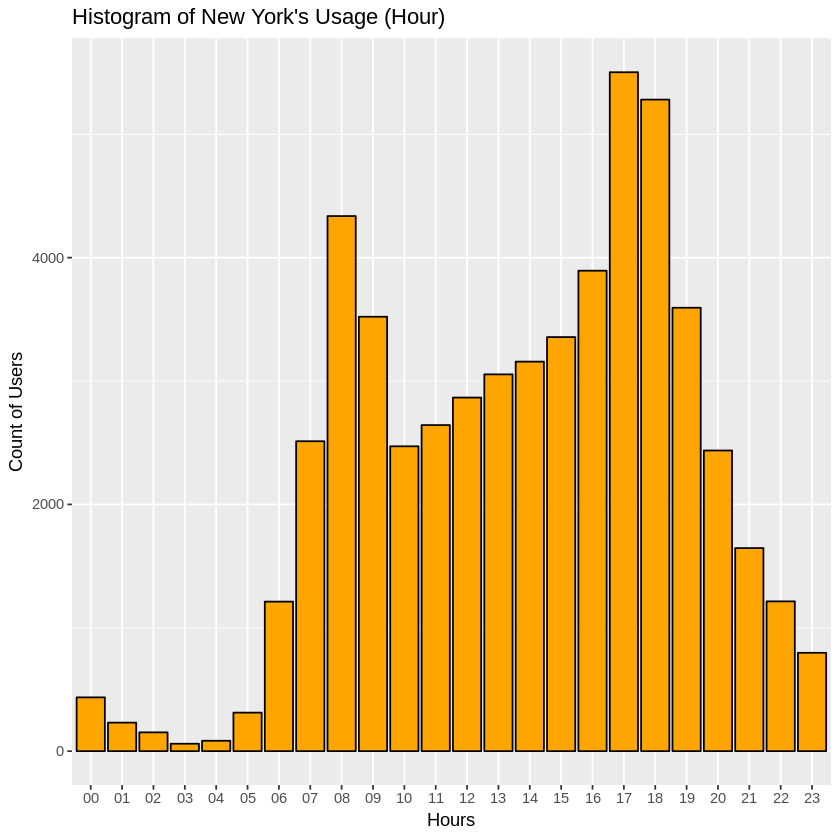

In [31]:
qplot(x=ny$Hour,data=ny, color=I('Black'),fill=I('orange'))+
ggtitle("Histogram of New York's Usage (Hour)") +
labs(x = "Hours")+
labs(y = "Count of Users")

In [32]:
#This will add a new column (Hour) to the dataframe with the specified format.

wash$Hour <- format(as.POSIXct(strptime(wash$Start.Time,"%Y-%m-%d %H:%M:%S",tz="")),format="%H")

#calculate the mode of the weekdays
wash_Hour_mode <- wash$Hour
wash_Hour_mode <- Mode(wash_Hour_mode)
paste("The most common Hour in Washington is: ", wash_Hour_mode)

[1] "The most common Hour in Washington is:  08"

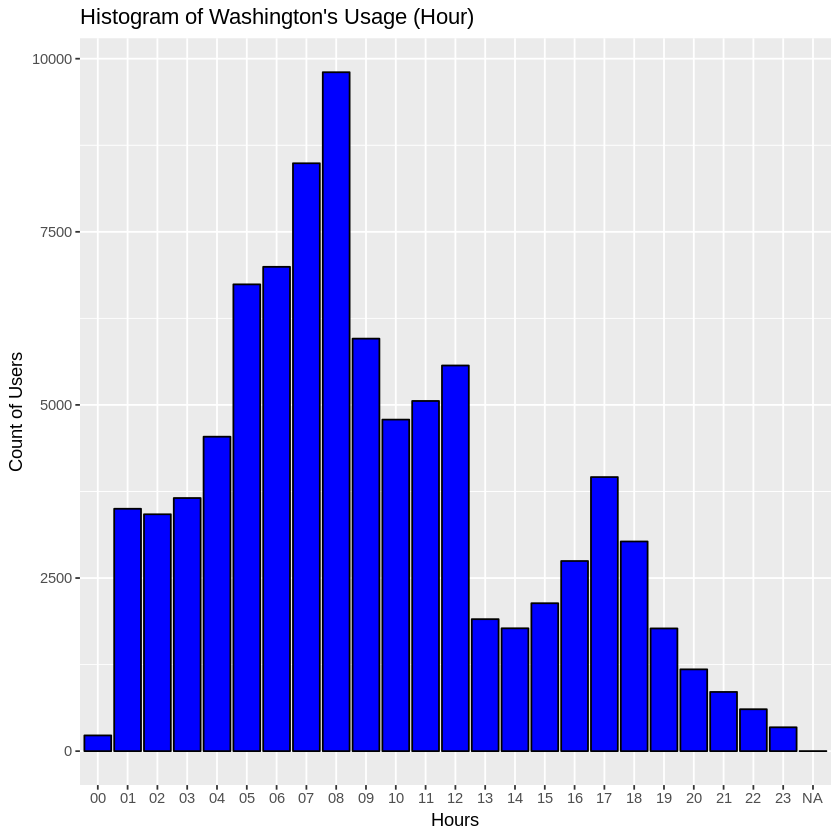

In [33]:
qplot(x=wash$Hour,data=wash, color=I('Black'),fill=I('Blue'))+
ggtitle("Histogram of Washington's Usage (Hour)") +
labs(x = "Hours")+
labs(y = "Count of Users")


In [ ]:
#This will add a new column (Hour) to the dataframe with the specified format.

Bike_share_df$Hour <- format(as.POSIXct(strptime(Bike_share_df$Start.Time,"%Y-%m-%d %H:%M:%S",tz="")),format="%H")

#calculate the mode of the weekdays
BS_Hour_mode <- Bike_share_df$Hour
BS_Hour_mode <- Mode(BS_Hour_mode)
paste("The most common Hour in all three cities is: ", BS_Hour_mode)

In [ ]:
qplot(x=Bike_share_df$Hour, data= Bike_share_df, color=I('Black'),fill=I('Black'))+
ggtitle("Histogram of all Bike share's Usage (Hour)") +
labs(x = "Hours")+
labs(y = "Count of Users")



**Summary of your question 1 results goes here.**

From the above exploration, It is shown that;
1. The most common Hour in Chicago city is: 17:00
2. The most common Hour in New York city is: 17:00
3. The most common Hour in Washington city is: 08:00
4. While, The most common Hour in all three cities is: 08:00

# Question 2

### Popular stations and trip

**Your question 2 goes here.**

## What is the most common start station?

In [ ]:
#most common start station in chicago city

chi.str.stat.mode <- chi$Start.Station
chi.str.stat.mode <- Mode(chi.str.stat.mode)

paste("The most common start station in Chicago is: ", chi.str.stat.mode)

In [ ]:
#most common start station in new york city

ny.str.stat.mode <- ny$Start.Station
ny.str.stat.mode <- Mode(ny.str.stat.mode)

paste("The most common start station in New york city is: ", ny.str.stat.mode)

In [ ]:
#most common start station in washington city

wash.str.stat.mode <- wash$Start.Station
wash.str.stat.mode <- Mode(wash.str.stat.mode)

paste("The most common start station in Washington is: ", wash.str.stat.mode)

In [ ]:
#most common start station for all three cities

BS.str.stat.mode <- Bike_share_df$Start.Station
BS.str.stat.mode <- Mode(BS.str.stat.mode)

paste("The most common start station in all three cities is: ", BS.str.stat.mode)

## What is the most common end station?

In [ ]:
#most common end station in chicago city

chi.end.stat.mode <- chi$End.Station
chi.end.stat.mode <- Mode(chi.end.stat.mode)

paste("The most common end station in Chicago is: ", chi.end.stat.mode)

In [ ]:
#most common end station in new york city

ny.end.stat.mode <- ny$End.Station
ny.end.stat.mode <- Mode(ny.end.stat.mode)

paste("The most common end station in New York city is: ", ny.end.stat.mode)

In [ ]:
#most common end station in washington city

wash.end.stat.mode <- wash$End.Station
wash.end.stat.mode <- Mode(wash.end.stat.mode)

paste("The most common end station in Washington city is: ", wash.end.stat.mode)

In [ ]:
#most common end station for all three cities

BS.end.stat.mode <- Bike_share_df$End.Station
BS.end.stat.mode <- Mode(BS.end.stat.mode)

paste("The most common end station in all three cities is: ", BS.end.stat.mode)

# Question 3

### Trip duration

**Your question 3 goes here.**

## What is the total travel time for users in different cities?

In [ ]:
#calculate total travel time for chicago (seconds)

chi_TT_secs <- sum(chi$Trip.Duration, na.rm = TRUE)

#convert total travel time to hours

chi_TT_hour <- chi_TT_secs/60

paste("The total travel time (in seconds) for users in Chicago city is: ", chi_TT_secs)
paste("The total travel time (in hours) for users in Chicago city is: ", chi_TT_hour)

In [ ]:
#calculate total travel time for new york (seconds)

ny_TT_secs <- sum(ny$Trip.Duration, na.rm = TRUE)

#convert total travel time to hours

ny_TT_hour <- ny_TT_secs/60

paste("The total travel time (in seconds) for users in New York city is: ", ny_TT_secs)
paste("The total travel time (in hours) for users in New York city is: ", ny_TT_hour)

In [ ]:
#calculate total travel time for washington (seconds)

wash_TT_secs <- sum(wash$Trip.Duration, na.rm = TRUE)

#convert total travel time to hours

wash_TT_hour <- wash_TT_secs/60

paste("The total travel time (in seconds) for users in Washington D.C is: ", wash_TT_secs)
paste("The total travel time (in hours) for users in Washington D.C is: ", wash_TT_hour)

In [ ]:
#calculate total travel time (seconds)

Total_TT_secs <- sum(Bike_share_df$Trip.Duration, na.rm = TRUE)

#convert total travel time to hours

Total_TT_hour <- Total_TT_secs/60

paste("The total travel time (in seconds) for users in all three cities is: ", Total_TT_secs)
paste("The total travel time (in hours) for users in  all three cities is: ", Total_TT_hour)

## What is the average travel time for users in different cities?

In [ ]:
#calculate Average travel time for chicago (seconds)

chi_AT_secs <- mean(chi$Trip.Duration, na.rm = TRUE)

#convert total travel time to hours

chi_AT_hour <- chi_AT_secs/60

paste("The average travel time (in seconds) for users in Chicago city is: ", chi_AT_secs)
paste("The average travel time (in hours) for users in Chicago city is: ", chi_AT_hour)

In [ ]:
#calculate Average travel time for new york (seconds)

ny_AT_secs <- mean(ny$Trip.Duration, na.rm = TRUE)

#convert total travel time to hours

ny_AT_hour <- ny_AT_secs/60

paste("The average travel time (in seconds) for users in New York city is: ", ny_AT_secs)
paste("The average travel time (in hours) for users in New York city is: ", ny_AT_hour)

In [ ]:
#calculate Average travel time for washington (seconds)

wash_AT_secs <- mean(wash$Trip.Duration, na.rm = TRUE)

#convert total travel time to hours

wash_AT_hour <- wash_AT_secs/60

paste("The average travel time (in seconds) for users in Washington D.C is: ", wash_AT_secs)
paste("The average travel time (in hours) for users in Washington city is: ", wash_AT_hour)

In [ ]:
#calculate Average travel time for all cities we have data for(seconds)

Total_AT_secs <- mean(Bike_share_df$Trip.Duration, na.rm = TRUE)

#convert total travel time to hours

Total_AT_hour <- Total_AT_secs/60

paste("The average travel time (in seconds) for users in all three cities is: ", Total_AT_secs)
paste("The average travel time (in hours) for users in all three cities is: ", Total_AT_hour)

# Question 4

**Your question 3 goes here.**

## What are the counts of each user type?

In [ ]:
summary(chi$User.Type)

In [ ]:
#To count the unique values using a for loop 

chi_subscriber = 0
chi_customer_user = 0
chi_NA_type = 0

for (x in chi$User.Type) {
    if (x == 'Subscriber') {
        chi_subscriber = chi_subscriber + 1
}    else if (x == 'Customer') {
        chi_customer_user = chi_customer_user + 1
}    else {
        chi_NA_type = chi_NA_type + 1
}
}
        

paste("Total Chicago Subscribers:", chi_subscriber)
paste("Total Chicago Customers:", chi_customer_user)
paste("Total Chicago NA user values:", chi_NA_type)

In [ ]:
# plot of user type in chicago city

qplot(x=User.Type, data=chi, color=I('Black'),fill=I('red'))+
ggtitle("Histogram of all Chicago User Types") +
labs(x = "User Types")+
labs(y = "Count of Users")


In [ ]:
# Count of user type in New York city
summary(ny$User.Type)

In [ ]:
#To count the unique values using a for loop 

ny_subscriber = 0
ny_customer_user = 0
ny_NA_type = 0

for (x in ny$User.Type) {
    if (x == 'Subscriber') {
        ny_subscriber = ny_subscriber + 1
}    else if (x == 'Customer') {
        ny_customer_user = ny_customer_user + 1
}    else {
        ny_NA_type = ny_NA_type + 1
}
}
        

paste("Total New York Subscribers:", ny_subscriber)
paste("Total New York Customers:", ny_customer_user)
paste("Total New York NA user values:", ny_NA_type)

In [ ]:
# plot of user type in New York city
qplot(x=User.Type, data=ny, color=I('Black'),fill=I('orange'))+
ggtitle("Histogram of all New York User Types") +
labs(x = "User Types")+
labs(y = "Count of Users")


In [ ]:
# Count of user type in Washington city
summary(wash$User.Type)

In [ ]:
#To count the unique values using a for loop 

wash_subscriber = 0
wash_customer_user = 0
wash_NA_type = 0

for (x in wash$User.Type) {
    if (x == 'Subscriber') {
        wash_subscriber = wash_subscriber + 1
}    else if (x == 'Customer') {
        wash_customer_user = wash_customer_user + 1
}    else {
        wash_NA_type = wash_NA_type + 1
}
}
        

paste("Total Washington Subscribers:", wash_subscriber)
paste("Total Washington Customers:", wash_customer_user)
paste("Total Washington NA user values:", wash_NA_type)

In [ ]:
# Plot of user type in Washington city

qplot(x=User.Type, data=wash, color=I('Black'),fill=I('Blue'))+
ggtitle("Histogram of all Washington User Types") +
labs(x = "User Types")+
labs(y = "Count of Users")


In [ ]:
# Total count of user type in in all three cities

summary(Bike_share_df$User.Type)

In [ ]:
#To count the unique values using a for loop 

subscriber_user = 0
customer_user = 0
dependent_user = 0
missing_user_type = 0

for (x in Bike_share_df$User.Type) {
    if (x == 'Subscriber') {
        subscriber_user = subscriber_user + 1
}    else if (x == 'Customer') {
        customer_user = customer_user + 1
}    else {
        missing_user_type = missing_user_type + 1
}
}
        

paste("Total Bikeshare Subscribers:", subscriber_user)
paste("Total Bikeshare Customers:", customer_user)
paste("Total Bikeshare NA user values:", missing_user_type)

In [ ]:
#To count the unique values using a for loop 

subscriber_user = 0
customer_user = 0
dependent_user = 0
missing_user_type = 0

for (x in Bike_share_df$User.Type) {
    if (x == 'Subscriber') {
        subscriber_user = subscriber_user + 1
}    else if (x == 'Customer') {
        customer_user = customer_user + 1
}    else {
        missing_user_type = missing_user_type + 1
}
}
        

paste("Total Bikeshare Subscribers:", subscriber_user)
paste("Total Bikeshare Customers:", customer_user)
paste("Total Bikeshare NA user values:", missing_user_type)

In [ ]:
# Plot the total count of user type in in all three cities

qplot(x=User.Type, data=Bike_share_df, color=I('Black'),fill=I('Black'))+
ggtitle("Histogram of all Bike Share User Types") +
labs(x = "User Types")+
labs(y = "Count of Users")


From the above exploration and visualizations, It is shown that;
1. Chicago city has:
Subscribers: 6883
Customers: 1746
Total NA count: 1

2. New York city has:
Subscribers: 49093
Customers: 5558
Total NA count: 119

3. WAshington city has:
Subscribers: 65600
Customers: 23450
Total NA count: 1

4. Total Bikeshare users are: 
Subscribers: 121576
Customers: 30754
Total NA count: 121

## What are the counts of each gender (only available for NYC and Chicago)?

In [ ]:
# counts of each gender for chicago city

summary(chi$Gender)

In [ ]:
#To count the unique values using a for loop 

chi_male_cust = 0
chi_female_cust = 0
chi_nan_gender = 0

for (x in chi$Gender){
    if (x == 'Male'){
        chi_male_cust =  chi_male_cust + 1
}    else if (x == 'Female'){
        chi_female_cust = chi_female_cust + 1
}    else {
        chi_nan_gender = chi_nan_gender + 1
}
}

paste("Chicago Male Users:", chi_male_cust)
paste("Chicago Female Users:", chi_female_cust)
paste("Chicago NA Genders:", chi_nan_gender)

In [ ]:
# Plot the count of each gender for chicago city

qplot(x=Gender, data=na.omit(chi), color=I('Black'),fill=I('red'))+
ggtitle("Histogram of Chicago Users' Genders") +
labs(x = "Genders")+
labs(y = "Count of Users")


In [ ]:
# counts of each gender for new york city

summary(ny$Gender)

In [ ]:
#To count the unique values using a for loop 

ny_male_cust = 0
ny_female_cust = 0
ny_nan_gender = 0

for (x in ny$Gender){
    if (x == 'Male'){
        ny_male_cust =  ny_male_cust + 1
}    else if (x == 'Female'){
        ny_female_cust = ny_female_cust + 1
}    else {
        ny_nan_gender = ny_nan_gender + 1
}
}

paste("New York Male Users:", ny_male_cust)
paste("New York Female Users:", ny_female_cust)
paste("New York NA Genders:", ny_nan_gender)

In [ ]:
# Plot the counts of each gender for new york city

qplot(x=Gender, data=na.omit(ny), color=I('Black'),fill=I('orange'))+
ggtitle("Histogram of New York Users' Genders") +
labs(x = "Genders")+
labs(y = "Count of Users")


In [ ]:
# Total count of each gender in chicago and new york coity combined

summary(NY_Chicago_df$Gender)

In [ ]:
#To count the unique values using a for loop 

Male_cust = 0
Female_cust = 0
nan_gender = 0

for (x in NY_Chicago_df$Gender){
    if (x == 'Male'){
        Male_cust =  Male_cust + 1
}    else if (x == 'Female'){
        Female_cust = Female_cust + 1
}    else {
        nan_gender = nan_gender + 1
}
}

paste("Total Bikeshare Male Users:", Male_cust)
paste("Total Bikeshare Female Users:", Female_cust)
paste("Total Bikeshare NA values:", nan_gender)

In [ ]:
# Polt the total count of each gender in chicago and new york coity combined

qplot(x=Gender, data=na.omit(NY_Chicago_df), color=I('Black'),fill=I('purple'))+
ggtitle("Histogram of Bike Share Users' Gender") +
labs(x = "Genders")+
labs(y = "Count of Users")

From the above exploration and visualizations, It is shown that;
1. Chicago city has:
Male Users: 5159,
Female Users: 1723,
total NA count: 1748,

2. New York city has:
Male Users: 37201,
Female Users: 12159,
total Na count: 5410,

3. Total Bikeshare users are: 
Male Users: 42360,
Female Users: 13882,
Total NA count: 7158

## What are the earliest, most recent, most common year of birth (only available for NYC and Chicago)?

## To find the earliest year of birth

In [ ]:
chi_earl_b_year <- min(chi$Birth.Year, na.rm = TRUE)

paste("The earliest birth year in Chicago is :", chi_earl_b_year)

In [ ]:
ny_earl_b_year <- min(ny$Birth.Year, na.rm = TRUE)

paste("The earliest birth year in New York city is :", ny_earl_b_year)

In [ ]:
All_earl_b_year <- min(NY_Chicago_df$Birth.Year, na.rm = TRUE)

paste("The earliest birth year in Chicago and New York city (combined) is :", All_earl_b_year)

## To find the most recent year of birth 

In [ ]:
chi_rec_birth_year <- max(chi$Birth.Year, na.rm = TRUE)

paste("The most recent birth year in Chicago is :", chi_rec_birth_year)

In [ ]:
ny_rec_birth_year <- max(ny$Birth.Year, na.rm = TRUE)

paste("The most recent birth year in New York city is :", ny_rec_birth_year)

In [ ]:
All_rec_birth_year <- max(NY_Chicago_df$Birth.Year, na.rm = TRUE)

paste("The most recent birth year in Chicago and New York city (combined) is :", All_rec_birth_year)

## To find the most common year of birth

In [ ]:
#Most common year of birth in chicago city

chi_com_year <- Mode(chi$Birth.Year)

paste("The most common year of birth in Chicago is :", chi_com_year)


In [ ]:
qplot(x=Birth.Year, data=chi, bins=35, xlim= c(1940, 1989), color=I('Black'),fill=I('red'))+
ggtitle("Histogram of Chicago Users' Birth Year") +
labs(x = "Birth Year")+
labs(y = "Count of Users")


In [ ]:
#Most common year of birth in new york city

ny_com_year <- Mode(ny$Birth.Year)


paste("The most common year of birth in New York city is :", ny_com_year)



In [ ]:
qplot(x=Birth.Year, data=ny, bins=65, xlim= c(1940, 2005), color=I('Black'),fill=I('orange'))+
ggtitle("Histogram of New York Users' Birth Year") +
labs(x = "Birth Year")+
labs(y = "Count of Users")


In [ ]:
#Most common year of birth in all cities

All_com_year <- Mode(NY_Chicago_df$Birth.Year)

paste("The most common year of birth in Chicago and New York city (combined) is :", All_com_year)


In [ ]:
qplot(x=Birth.Year, data=NY_Chicago_df, bins=50, xlim= c(1940, 2005), color=I('Black'),fill=I('purple'))+
ggtitle("Histogram of all Bike Share Users' Birth Year") +
labs(x = "Birth Year")+
labs(y = "Count of Users")


From the above exploration and visualizations, It is shown that;
1. The most common year of birth in Chicago is : 1989
2. The most common year of birth in New York city is : 1989
3. The most common year of birth in Chicago and New York city (combined) is : 1989


## Finishing Up

> Congratulations!  You have reached the end of the Explore Bikeshare Data Project. You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the [rubric](https://review.udacity.com/#!/rubrics/2508/view). 


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [ ]:
system('python -m nbconvert Explore_bikeshare_data.ipynb')